# 6510405750 ภูมิระพี เสริญวริชกุล


In [45]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import shap

In [46]:
df = pd.read_csv('data/cancer.csv')
df.head(5)

,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,CA level
0,F,Y,Y,Y,Y,14.5,261,2.60,156,1718.0,137.95,172,190,12.2,4
1,F,N,Y,Y,N,1.1,302,4.14,54,7394.8,113.52,88,221,10.6,3
2,M,N,N,N,S,1.4,176,3.48,210,516.0,96.10,55,151,12.0,4
3,F,N,Y,Y,S,1.8,244,2.54,64,6121.8,60.63,92,183,10.3,4
4,F,N,Y,Y,N,3.4,279,3.53,143,671.0,113.15,72,136,10.9,3


In [47]:
df['Sex'] = df['Sex'].map({'M': 1, 'F': 0})
df['Ascites'] = df['Ascites'].map({'Y': 1, 'N': 0, 'S': 2})
df['Hepatomegaly'] = df['Hepatomegaly'].map({'Y': 1, 'N': 0, 'S': 2})
df['Spiders'] = df['Spiders'].map({'Y': 1, 'N': 0, 'S': 2})
df['Edema'] = df['Edema'].map({'Y': 1, 'N': 0, 'S': 2})

X = df.drop(columns=['CA level']) # feature
y = df['CA level'] # class

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4) # แบ่งข้อมูลเป็น train และ test

In [49]:
clf = MultinomialNB(alpha=1.5, class_prior=None, fit_prior=True)
clf.fit(X_train, y_train)

MultinomialNB(alpha=1.5)

In [50]:
y_pred = clf.predict(X_test)

In [51]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy : {accuracy}")

Accuracy : 0.44871794871794873


Using 232 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


AssertionError: 'shap_values' and 'features' values must have the same number of rows!

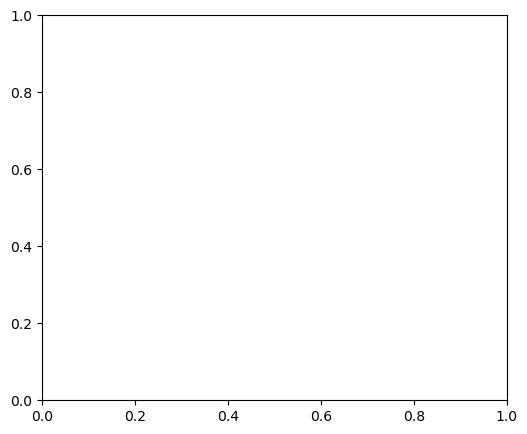

In [60]:
explainer = shap.KernelExplainer(clf.predict_proba, X_train)
shape_values = explainer.shap_values(X_test.iloc[0,:])
shap.dependence_plot("Sex", shape_values[0], X_test, interaction_index=None, show=False)